Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Your code should run from top to bottom with no errors. Failure to do this will result in loss of points.

You should not use `install.packages()` anywhere. You may assume that we have already installed all the packages needed to run your code.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE" and delete the `stop()` functions, as well as your name and collaborators below:

In [1]:
NAME = "aayushap"  # your uniqname 
COLLABORATORS = c("sohumm", "pjmerica", "kaspersj")  # vector of uniqnames of your collaborators, if any
## IMPORTANT: you must also have set your group on Canvas. This is only used as a backup.

---

In [2]:
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


# STATS 306
## Problem set 1: Plotting with `ggplot`

Each problem is worth one to four points, depending on difficulty, for a total of 20.

## Part 1

### Factors
Factors are used in R to represent discrete or categorical variables. We will discuss factors at greater length later in the course. This exercise is designed to show you how `ggplot` handles factors when plotting data.

#### Problem 1 (1 pt.) 
Use the `tribble()` command to re-create the following small data table. (See the lecture notes for an example of how to use this commmand.) Store your table in a variable called `toy_table`. That is, when we run your notebook, the following should happen:

```{r}
> toy_table
# A tibble: 4 x 2
      x     y
  <chr> <dbl>
1     a     1
2     b     2
3     c     4
4     d     5
```

In [3]:
toy_table <- tribble (~x, ~y, "a", 1, "b", 2, "c", 4, "d", 5)
toy_table


x,y
a,1
b,2
c,4
d,5


#### Problem 2 (1 pt.)
Use `ggplot` to generate the following plot from `toy_table`:
![toy table plot](toy_table.png) 

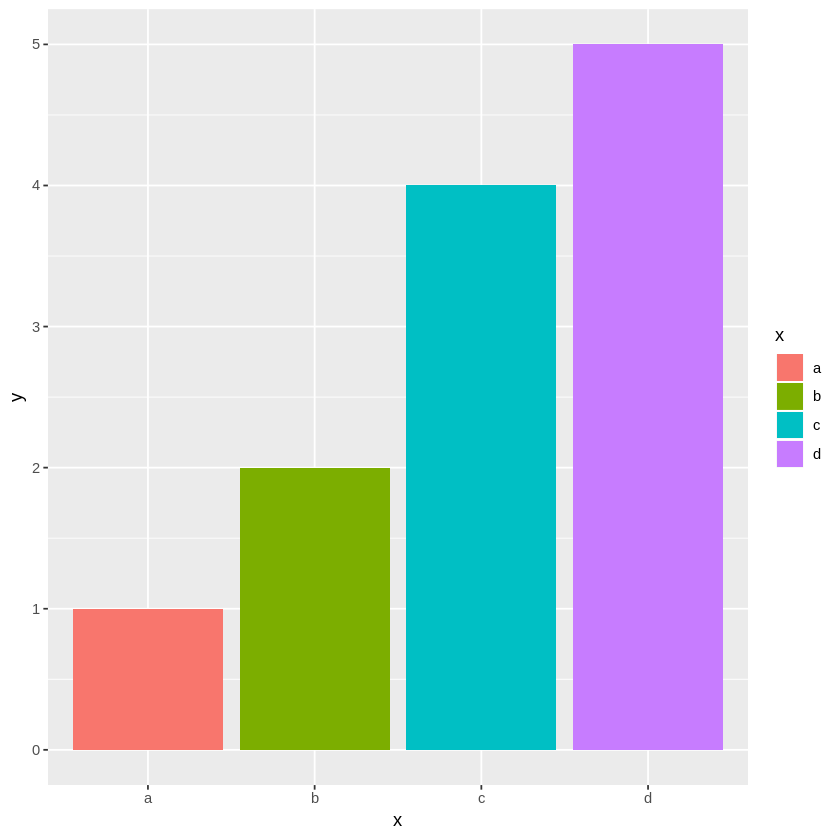

In [7]:
ggplot(data = toy_table) +
  geom_bar(mapping = aes(x = x, y = y , fill = x), stat = "identity")

#### Problem 3 (1 pt.)
Suppose that we want to change the ordering of the $x$-axis to be `d c b a`. To do this we need to convert $x$ to a factor and reorder its levels. The syntax for doing this is 
```{r}
factor(x, levels=c('d','c','b','a'))
```
This produces the following plot:
![toy table releveled](toy_table_relevel.png)

Use this technique to produce a plot where the bars are ordered `c,a,b,d':

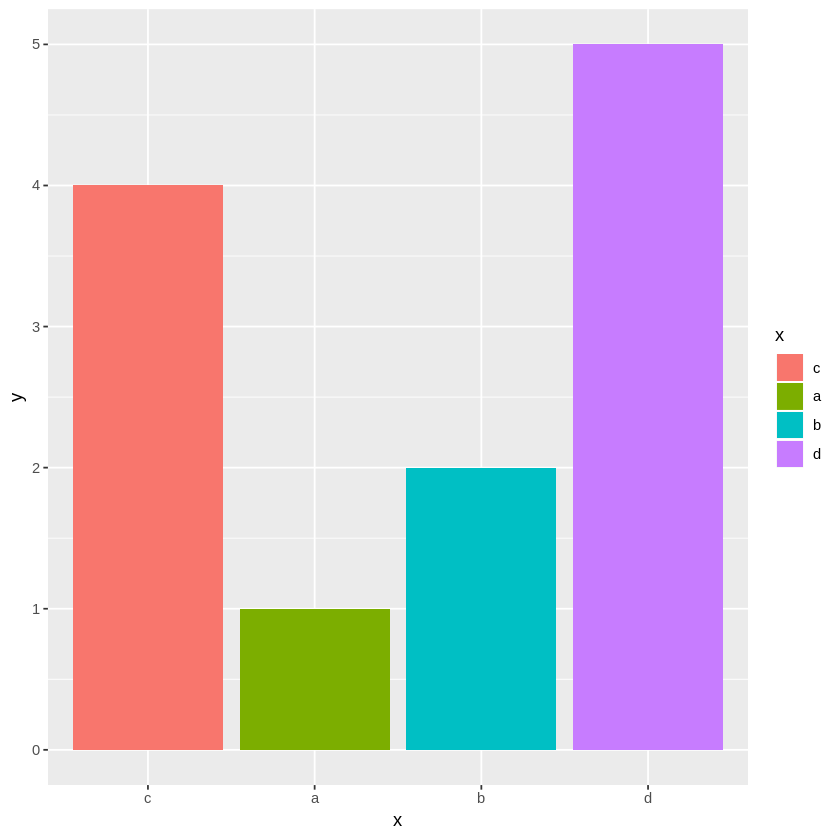

In [26]:
toy_table_x <- factor(toy_table$x , levels = c("c", "a", "b", "d"))
ggplot(data = toy_table) +
  geom_col(mapping = aes(x = toy_table_x, y = y , fill = toy_table_x)) +
xlab("x") +
scale_fill_discrete(name="x")


## Part 2
For each of the plots shown below, enter the R code in the cell provided which reproduces the plot. Your could should print this plot in the notebook.

(Your solution should match the colors, axis labels & titles, plot type, orientation, and so forth. We do not care about minor visual differences in the font / font size, width / height, etc.)

#### Problem 5 (4 pts.)
![auto plot](p1.png)

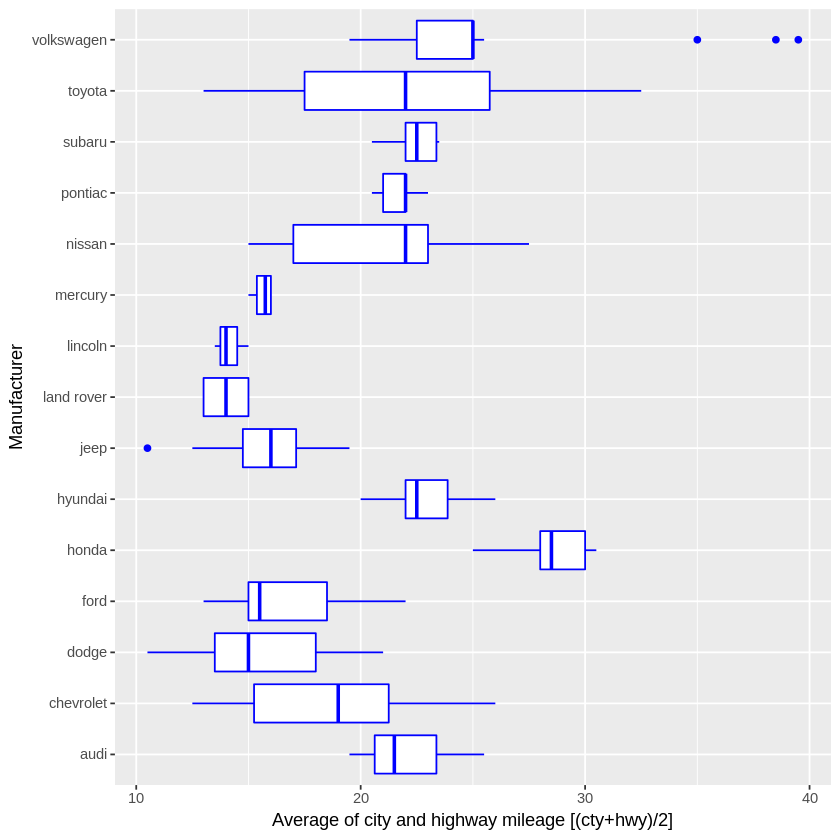

In [19]:
ggplot(data = mpg, aes(x = manufacturer, (y = (cty+hwy)/2))) + 
geom_boxplot(fill="white", color="blue",) + 
coord_flip() + # Turns boxplots horizontal and flips axes
labs(x = "Manufacturer", y = "Average of city and highway mileage [(cty+hwy)/2]") # Labels axes



#### Problem 6 (4 pts.)
This is using the `midwest` data set which we discussed at the end of lecture 02.
![plot two](p2.png)

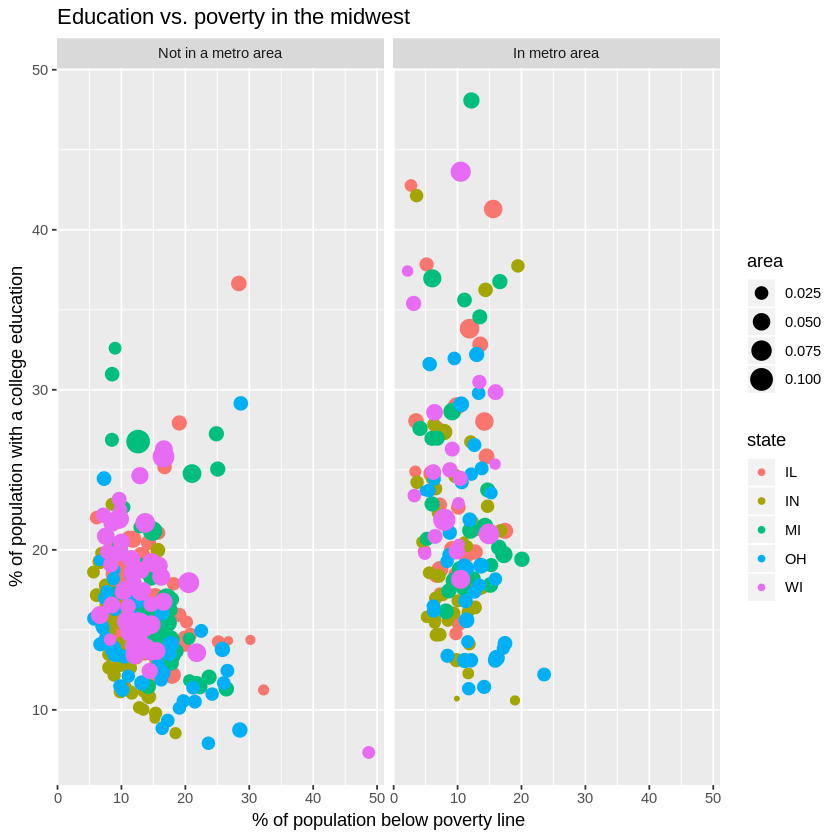

In [20]:
label <- c("0" = "Not in a metro area",
           "1" ="In metro area")  # Labels of individuals facets
ggplot(data = midwest) + 
ggtitle("Education vs. poverty in the midwest") +
labs(x = "% of population below poverty line", y = "% of population with a college education") +
geom_point(mapping = aes(x = percbelowpoverty, y = percollege, size = area, color = state)) +
facet_wrap(~inmetro, nrow = 1, labeller = labeller(inmetro = label)) # Creates two grids



#### Problem 7 (4 pts.)
(Hint: for this plot, you will need to manually manipulate the ticks on the $y$-axis using the `breaks=` option of the appropriate `scale_y` command.)
![diamonds plot](p3.png)


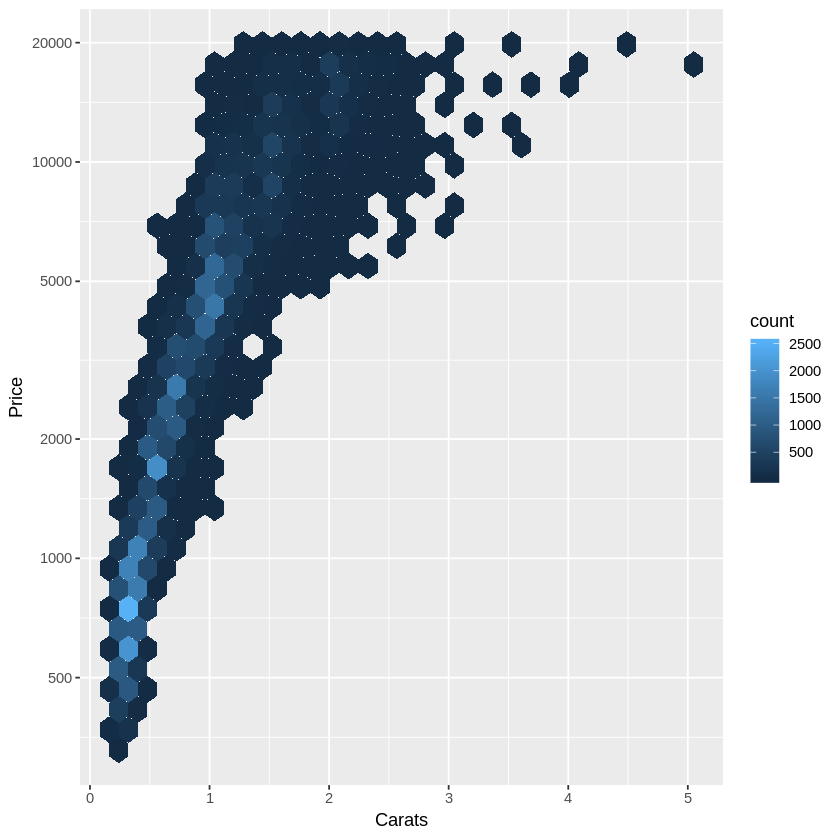

In [21]:
ggplot(data = diamonds, aes(carat, price)) +
geom_hex() +
labs(x = "Carats", y = "Price") +
scale_y_log10(breaks = c(500, 1000, 2000, 5000, 10000, 20000)) # Individual Tickmarks


#### Problem 8 (4 pts.)
In lecture 0 we looked at a database on flights in New York City in 2013. This data set is not part of the `tidyverse` package. You may need to install it using the command:
```{r}
install.packages('nycflights13')
``` 
![plot four](p4.png)
This plots is average delay time by carrier for the top five carriers. Because we have not yet learned how to compute such an average, the code that does this has been provided for you. Use the resulting dataset, `flights_top5`, to generate the plot.

In [23]:
library(nycflights13)
top5_carriers = group_by(flights, carrier) %>% summarize(departures=n()) %>% 
                ungroup() %>% top_n(5)
flights_top5 =  filter(flights, carrier %in% top5_carriers$carrier) %>% 
                filter(dep_delay>0) %>% group_by(carrier, month) %>% 
                summarize(mean_dep_delay=mean(dep_delay))

Selecting by departures


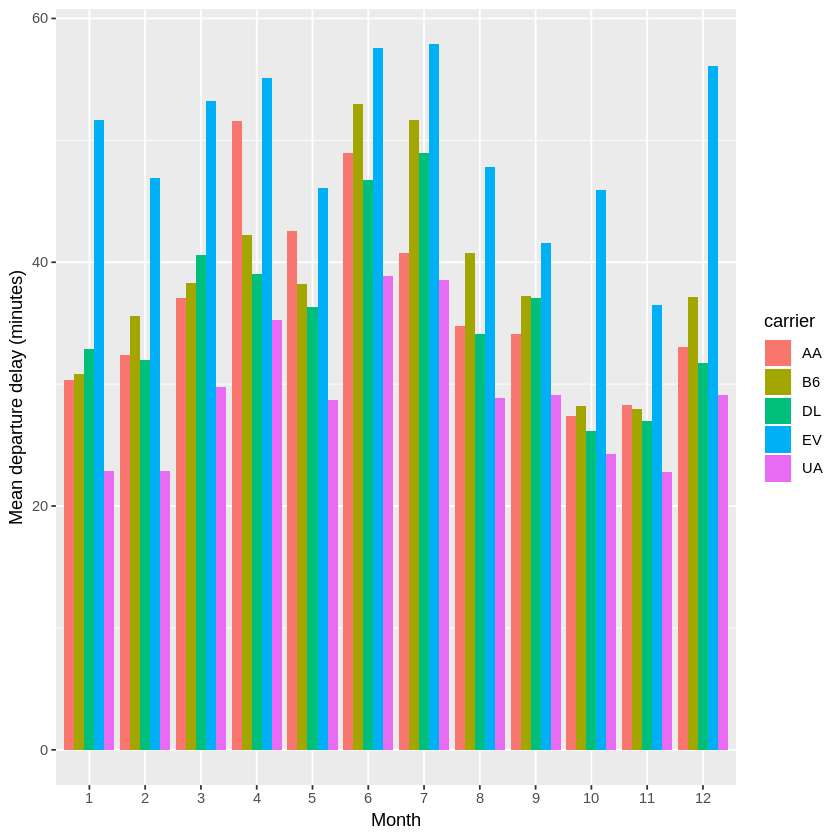

In [24]:
 flights_top5$month = factor(flights_top5$month)
ggplot(data = flights_top5) + 
  geom_bar(mapping = aes(x = month, y = mean_dep_delay, fill = carrier), stat = "identity" , position = "dodge") +
 xlab("Month") + ylab("Mean departure delay (minutes)")


